### Data Extraction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyomo.environ as pyo
import time
from itertools import chain, combinations

In [2]:
df = pd.read_csv("/home/anuttar/Desktop/Assignments/IE647_Assignment3/iit.csv")
df = df.rename(columns={"#IIT": "IIT"})
df

,IIT,Latitude,Longitude
0,IITKGP,22.3149,87.3105
1,IITB,19.1328,72.9153
2,IITM,12.9915,80.2337
3,IITK,26.5214,80.2321
4,IITD,28.5447,77.1862
5,IITG,26.1968,91.6755
6,IITR,28.0068,82.1585
7,IITRPR,30.9269,75.4918
8,IITBBS,20.1495,85.6685
9,IITGN,23.2132,72.6830


In [3]:
print("Number of IITs to be visited (n): ", df.shape[0])
n = df.shape[0]

Number of IITs to be visited (n):  23


### Cost Computation

In [4]:
def euclidean_distance (iit1, iit2):
    delta_lat = df["Latitude"][iit1] - df["Latitude"][iit2]
    delta_long = df["Longitude"][iit1] - df["Longitude"][iit2]
    dist = 110 * np.sqrt(delta_lat**2 + delta_long**2)
    return dist

In [5]:
C = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        C[i][j] = euclidean_distance(i, j)

## Model 1: DFJ Model
#### Variables Used

$D = (V, A)$ : Directed Graph with Vertex Set $V$ and directed edges set $A$ <br>
$c_a$ : Cost associated with edge $a$ <br>
$x_a$ : Binary Variable that is equal to 1 if we pick edge $a$ and 0 otherwise <br>
$\delta^{+}(v)$ : Set of all outgoing edges from vertex $v$ <br>
$\delta^{-}(v)$ : Set of all incoming edges from vertex $v$ <br>

#### Model

$
\min \sum_{a \in A} c_a x_a  \quad  s.t.
$
<br><br>

$
\sum_{a \in \delta^+(i)} x_a = 1 \quad \forall \ i \in V
$

$
\sum_{a \in \delta^-(i)} x_a = 1 \quad \forall \ i \in V
$

$
\sum_{a \in \delta^+(S)} x_a \geq 1 \quad \forall \ \emptyset \subset S \subset V \quad (subtour \ elimination \ constraints)
$

$
x_a \in \{0,1\} \quad \forall \ a \in A.
$


### Solution for Exact Integer Programming Problem
Solver Used: CBC

#### Without Subtour Elimination Constraints

In [6]:
start_time = time.time()

#Define Model
model = pyo.ConcreteModel()

#Define Variables
model.X = pyo.Var(range(n), range(n), within=pyo.Binary)

#Define Objective Function
model.obj = pyo.Objective(expr = sum(sum(C * model.X)), sense = pyo.minimize)

#Define Constraints
model.constraints = pyo.ConstraintList()
for i in range(n):
    model.constraints.add(sum(model.X[i, j] for j in range(n)) == 1)

for j in range(n):
    model.constraints.add(sum(model.X[i, j] for i in range(n)) == 1)
    
for i in range(n):
    model.constraints.add(model.X[i, i] == 0)

# Select solver
solver = pyo.SolverFactory('cbc')
# solver.options["seconds"] = 100
# solver.options["maxIterations"] = 1000000000

# Solve the problem
result = solver.solve(model)

# Display results
print('Status:', result.solver.status)
print('Termination Condition:', result.solver.termination_condition)
print('Optimal Objective:', pyo.value(model.obj))

end_time = time.time()
print("Time taken: ", end_time - start_time, " seconds")

Status: ok
Termination Condition: optimal
Optimal Objective: 7973.315913919976
Time taken:  0.06406235694885254  seconds


#### Adding Subtour Elimination Constraints

Generating Power set

In [7]:
def powerset(A):
    s = list(A)
    return list(chain.from_iterable(combinations(s, r) for r in range(len(s) + 1)))

In [8]:
S = list(range(0, n, 1))
pS = powerset(S)
pS.remove(())
pS.remove(tuple(S))
print("Number of IITs in the largest subtour that I am considering: ", len(S))
print("Power Set Size: ", len(pS))

Number of IITs in the largest subtour that I am considering:  23
Power Set Size:  8388606


Adding all the subtour elimination constraints are expected to take about <b>7 Years</b> to finish computation, if we add constraints one by one and compute after each addition. Therefore, I am only considering subsets of <b>atmost size 5</b> for subtour elimination, which is expected to take roughly <b>30 minutes</b> to compute and give a plot of Cost vs Number of Subtour Elimination Constraints at the end.

Adding Constraints and Solving

Status Update:  100 / 8388606   |  Time:  0  min
Status Update:  200 / 8388606   |  Time:  0  min
Status Update:  300 / 8388606   |  Time:  0  min
Status Update:  400 / 8388606   |  Time:  0  min
Status Update:  500 / 8388606   |  Time:  0  min
Status Update:  600 / 8388606   |  Time:  0  min
Status Update:  700 / 8388606   |  Time:  0  min
Status Update:  800 / 8388606   |  Time:  0  min
Status Update:  900 / 8388606   |  Time:  1  min
Status Update:  1000 / 8388606   |  Time:  1  min
Status Update:  1100 / 8388606   |  Time:  1  min
Status Update:  1200 / 8388606   |  Time:  1  min
Status Update:  1300 / 8388606   |  Time:  2  min
Status Update:  1400 / 8388606   |  Time:  2  min
Status Update:  1500 / 8388606   |  Time:  2  min
Status Update:  1600 / 8388606   |  Time:  3  min
Status Update:  1700 / 8388606   |  Time:  3  min
Status Update:  1800 / 8388606   |  Time:  3  min
Status Update:  1900 / 8388606   |  Time:  4  min
Status Update:  2000 / 8388606   |  Time:  4  min
Status Up

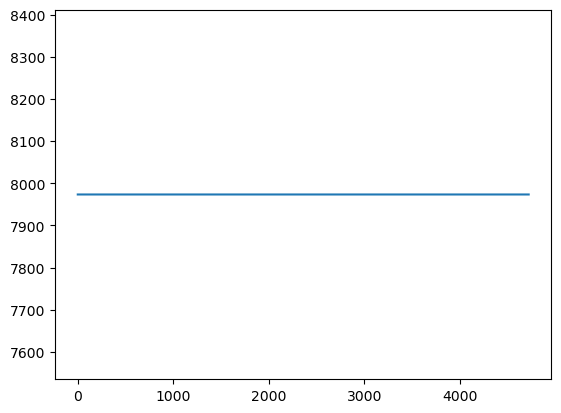

In [20]:
start_time = time.time()

useful_list = []
    
#Define Model
model = pyo.ConcreteModel()

#Define Variables
model.X = pyo.Var(range(n), range(n), within=pyo.Binary)

#Define Objective Function
model.obj = pyo.Objective(expr = sum(sum(C * model.X)), sense = pyo.minimize)

#Define Constraints
model.constraints = pyo.ConstraintList()
for i in range(n):
    model.constraints.add(sum(model.X[i, j] for j in range(n)) == 1)

for j in range(n):
    model.constraints.add(sum(model.X[i, j] for i in range(n)) == 1)

for i in range(n):
    model.constraints.add(model.X[i, i] == 0)

#Adding Subtour Elimination Constraints
count = 0
for u in pS:
    count += 1
    
    model.constraints.add(sum(sum(model.X[i, j] for j in range(n)) for i in u) >= 1)

    # Select solver
    solver = pyo.SolverFactory('cbc')
#     solver.options["seconds"] = 100

    # Solve the problem
    result = solver.solve(model)
    
    useful_list.append(pyo.value(model.obj))
    if (count % 100 == 0):
        end_time = time.time()
        print("Status Update: ", count, "/", len(pS), "  |  Time: ", int((end_time - start_time)/60), " min")
    
    if (int((time.time() - start_time)/60) > 30):
        break


end_time = time.time()
print("Time taken: ", int((end_time - start_time)/60), " min")

x = np.linspace(1, len(useful_list), len(useful_list))
plt.plot(x, useful_list)

### Solution for LP Relaxation Problem

In [17]:
start_time = time.time()
    
#Define Model
model = pyo.ConcreteModel()

#Define Variables
model.X = pyo.Var(range(n), range(n), within=pyo.NonNegativeReals, bounds=(0,1))

#Define Objective Function
model.obj = pyo.Objective(expr = sum(sum(C * model.X)), sense = pyo.minimize)

#Define Constraints
model.constraints = pyo.ConstraintList()
for i in range(n):
    model.constraints.add(sum(model.X[i, j] for j in range(n)) == 1)

for j in range(n):
    model.constraints.add(sum(model.X[i, j] for i in range(n)) == 1)

for i in range(n):
    model.constraints.add(model.X[i, i] == 0)

#Adding Subtour Elimination Constraints
for u in pS[:10000]:
    model.constraints.add(sum(sum(model.X[i, j] for j in range(n)) for i in u) >= 1)

# Select solver
solver = pyo.SolverFactory('ipopt')

# Solve the problem
result = solver.solve(model)

# Display results
print('Status:', result.solver.status)
print('Termination Condition:', result.solver.termination_condition)
print('Optimal Objective:', pyo.value(model.obj))

end_time = time.time()
print("Time taken: ", end_time - start_time, "seconds")

Status: ok
Termination Condition: optimal
Optimal Objective: 7973.312134685812
Time taken:  23.497649431228638 seconds


## Model 2: MTZ Formulation

#### Variables Used
$D = (V, A)$ : Directed Graph with Vertex Set $V$ and directed edges set $A$ <br>
$n$ : Number of IITs/Vertices ($n = 23$)<br>
$c_a$ : Cost associated with edge $a$ <br>
$x_a$ : Binary Variable that is equal to 1 if we pick edge $a$ and 0 otherwise <br>
$\delta^{+}(v)$ : Set of all outgoing edges from vertex $v$ <br>
$\delta^{-}(v)$ : Set of all incoming edges from vertex $v$ <br>
$u_i$ : Denotes the position in the Hamiltonian tour ($ 1 <= u_i <= 23 $)

#### Model
$
\min \sum_{a \in A} c_a x_a  \quad  s.t.
$
<br><br>
$
\sum_{a \in \delta^+(i)} x_a = 1 \quad \forall \ i \in V
$

$
\sum_{a \in \delta^-(i)} x_a = 1 \quad \forall \ i \in V
$

$
u_i - u_j + 1 \leq n(1 - x_{ij}) \quad \text{for all } ij \in A, \; i, j \neq 1. \quad (subtour \ elimination \ constraints)
$

$
x_a \in \{0,1\} \quad \forall \ a \in A.
$

#### Solution for Exact Integer Programming Problem

In [28]:
start_time = time.time()

#Initialisation
u = np.zeros(n)

#Define Model
model = pyo.ConcreteModel()

#Define Variables
model.X = pyo.Var(range(n), range(n), within=pyo.Binary)
model.u = pyo.Var(range(n), within=pyo.Integers, bounds=(1,24))

#Define Objective Function
model.obj = pyo.Objective(expr = sum(sum(C * model.X)), sense = pyo.minimize)

#Define Constraints
model.constraints = pyo.ConstraintList()
for i in range(n):
    model.constraints.add(sum(model.X[i, j] for j in range(n)) == 1)

for j in range(n):
    model.constraints.add(sum(model.X[i, j] for i in range(n)) == 1)
    
for i in range(n):
    model.constraints.add(model.X[i, i] == 0)

#Adding Subtour Elimination Constraints
for i in range(n):
    for j in range(n):
        if (i == j):
            continue
        model.constraints.add(model.u[i] - model.u[j] + 1 <= n*(1 - model.X[i, j]))
    
# Select solver
solver = pyo.SolverFactory('cbc')
solver.options['seconds'] = 300

# Solve the problem
result = solver.solve(model)

# Display results
print('Status:', result.solver.status)
print('Termination Condition:', result.solver.termination_condition)
print('Optimal Objective:', pyo.value(model.obj))

end_time = time.time()
print("Time taken: ", end_time - start_time, " seconds")

containing a solution
Status: aborted
Termination Condition: intermediateNonInteger
Optimal Objective: 8010.7608693006705
Time taken:  301.6949374675751  seconds


#### Solution for LP Relaxation Problem

In [29]:
start_time = time.time()

#Initialisation
u = np.zeros(n)

#Define Model
model = pyo.ConcreteModel()

#Define Variables
model.X = pyo.Var(range(n), range(n), within=pyo.NonNegativeReals)
model.u = pyo.Var(range(n), within=pyo.NonNegativeReals, bounds=(1,24))

#Define Objective Function
model.obj = pyo.Objective(expr = sum(sum(C * model.X)), sense = pyo.minimize)

#Define Constraints
model.constraints = pyo.ConstraintList()
for i in range(n):
    model.constraints.add(sum(model.X[i, j] for j in range(n)) == 1)

for j in range(n):
    model.constraints.add(sum(model.X[i, j] for i in range(n)) == 1)
    
for i in range(n):
    model.constraints.add(model.X[i, i] == 0)

#Adding Subtour Elimination Constraints
for i in range(n):
    for j in range(n):
        if (i == j):
            continue
        model.constraints.add(model.u[i] - model.u[j] + 1 <= n*(1 - model.X[i, j]))
    
# Select solver
solver = pyo.SolverFactory('ipopt')

# Solve the problem
result = solver.solve(model)

# Display results
print('Status:', result.solver.status)
print('Termination Condition:', result.solver.termination_condition)
print('Optimal Objective:', pyo.value(model.obj))

end_time = time.time()
print("Time taken: ", end_time - start_time, " seconds")

Status: ok
Termination Condition: optimal
Optimal Objective: 8010.757017171542
Time taken:  0.08129596710205078  seconds


## Model 3: 3 Index Model

#### Variables Used
$D = (V,A)$ : D is a directed Graph with vertex set $V$ and set of directed edges $A$ <br>
$X_{ijk}$ : $X$ is a binary variable that is equal to 1 iff the edge $ij$ is the $k^{th}$ edge in the Hamiltonian tour <br>
$C_a$ : Cost for edge $a$ <br>
$\delta^{+}(v)$ : set of outgoing edges from vertex $v$ <br>
$\delta^{-}(v)$ : set of incoming edges from vertex $v$ <br>

#### Model
$
\min \sum_{a \in A} \sum_{k} c_a x_{ak} \quad s.t.
$
<br><br>
$
\sum_{a \in \delta^+(i)} \sum_{k} x_{ak} = 1 \quad \forall i = 1, \dots, n
$

$
\sum_{a \in \delta^-(i)} \sum_{k} x_{ak} = 1 \quad \forall i = 1, \dots, n
$

$
\sum_{a \in A} x_{ak} = 1 \quad \forall k = 1, \dots, n
$

$
\sum_{a \in \delta^-(i)} x_{ak} = \sum_{a \in \delta^+(i)} x_{a,k+1} \quad \forall i = 1, \dots, n \text{ and } k = 1, \dots, n-1
$

$
\sum_{a \in \delta^-(1)} x_{an} = \sum_{a \in \delta^+(1)} x_{a1} = 1
$

$
x_{ak} = 0 \text{ or } 1 \quad \forall a \in A, k = 1, \dots, n.
$


#### Solution For Exact Integer Programming Problem

In [23]:
start_time = time.time()

#Initialisation
u = np.zeros(n)

#Define Model
model = pyo.ConcreteModel()

#Define Variables
model.X = pyo.Var(range(n), range(n), range(1,n+1,1), within=pyo.Binary)

#Define Objective Function
model.obj = pyo.Objective(expr = sum(sum(sum(C[i,j] * model.X[i,j,k] for k in range(1,n+1,1)) for j in range(n)) for i in range(n)), sense = pyo.minimize)

#Define Constraints
model.constraints = pyo.ConstraintList()
for i in range(n):
    model.constraints.add(sum(sum(model.X[i, j, k] for k in range(1,n+1,1)) for j in range(n)) == 1)

for j in range(n):
    model.constraints.add(sum(sum(model.X[i, j, k] for k in range(1,n+1,1)) for i in range(n)) == 1)
    
for i in range(n):
    for k in range(1,n+1,1):
        model.constraints.add(model.X[i, i, k] == 0)

for k in range(1,n+1,1):
    model.constraints.add(sum(sum(model.X[i,j,k] for i in range(n)) for j in range(n)) == 1)

for i in range(n):
    for k in range(1,n,1):
        model.constraints.add(sum(model.X[j,i,k] for j in range(n)) == sum(model.X[i,j,k+1] for j in range(n)))

model.constraints.add(sum(model.X[i,0,n] for i in range(n)) == 1)
model.constraints.add(sum(model.X[0,j,1] for j in range(n)) == 1)
    
# Select solver
solver = pyo.SolverFactory('cbc')

# Solve the problem
result = solver.solve(model)

# Display results
print('Status:', result.solver.status)
print('Termination Condition:', result.solver.termination_condition)
print('Optimal Objective:', pyo.value(model.obj))

end_time = time.time()
print("Time taken: ", end_time - start_time, " seconds")

Status: ok
Termination Condition: optimal
Optimal Objective: 8762.97742252097
Time taken:  4.099977970123291  seconds


#### Solution for LP Relaxation Problem

In [27]:
start_time = time.time()

#Initialisation
u = np.zeros(n)

#Define Model
model = pyo.ConcreteModel()

#Define Variables
model.X = pyo.Var(range(n), range(n), range(1,n+1,1), within=pyo.NonNegativeReals)

#Define Objective Function
model.obj = pyo.Objective(expr = sum(sum(sum(C[i,j] * model.X[i,j,k] for k in range(1,n+1,1)) for j in range(n)) for i in range(n)), sense = pyo.minimize)

#Define Constraints
model.constraints = pyo.ConstraintList()
for i in range(n):
    model.constraints.add(sum(sum(model.X[i, j, k] for k in range(1,n+1,1)) for j in range(n)) == 1)

for j in range(n):
    model.constraints.add(sum(sum(model.X[i, j, k] for k in range(1,n+1,1)) for i in range(n)) == 1)
    
for i in range(n):
    for k in range(1,n+1,1):
        model.constraints.add(model.X[i, i, k] == 0)

for k in range(1,n+1,1):
    model.constraints.add(sum(sum(model.X[i,j,k] for i in range(n)) for j in range(n)) == 1)

for i in range(n):
    for k in range(1,n,1):
        model.constraints.add(sum(model.X[j,i,k] for j in range(n)) == sum(model.X[i,j,k+1] for j in range(n)))

model.constraints.add(sum(model.X[i,0,n] for i in range(n)) == 1)
model.constraints.add(sum(model.X[0,j,1] for j in range(n)) == 1)
    
# Select solver
solver = pyo.SolverFactory('ipopt')

# Solve the problem
result = solver.solve(model)

# Display results
print('Status:', result.solver.status)
print('Termination Condition:', result.solver.termination_condition)
print('Optimal Objective:', pyo.value(model.obj))

end_time = time.time()
print("Time taken: ", end_time - start_time, " seconds")

Status: ok
Termination Condition: optimal
Optimal Objective: 8272.650797085898
Time taken:  3.0214779376983643  seconds


## Comparison

In the DFJ Model and the MTZ Model, the same results were obtained by LP Relaxation at a really fast rate (in seconds).<br>
The 3 Index Model proved to be the fastest among the 3 models and was able to solve the Travelling Salesman Problem with all the constraints at a really fast rate. <br>
With 3 Index model, I came to realise that the LP Relaxation solution as well as the solutions provided by the other models have been incorrect. This means that there exists a subtour taken by the Algorithm to minimise the total cost, due to which the path taken is not a Hamiltonian tour. Therefore, we need to eliminate all the subtour possibility in order to conclude that the solution is correct.